## Urban Sound Classification

In [238]:
# !pip install librosa

## EDA

In [440]:
import matplotlib.pyplot as plt
%matplotlib inline

In [441]:
test_audio = "dog_bark.wav"

In [442]:
import IPython.display as ipd #help us to displat some graphs of audio
import librosa
import librosa.display #Visualization and display routines using matplotlib.

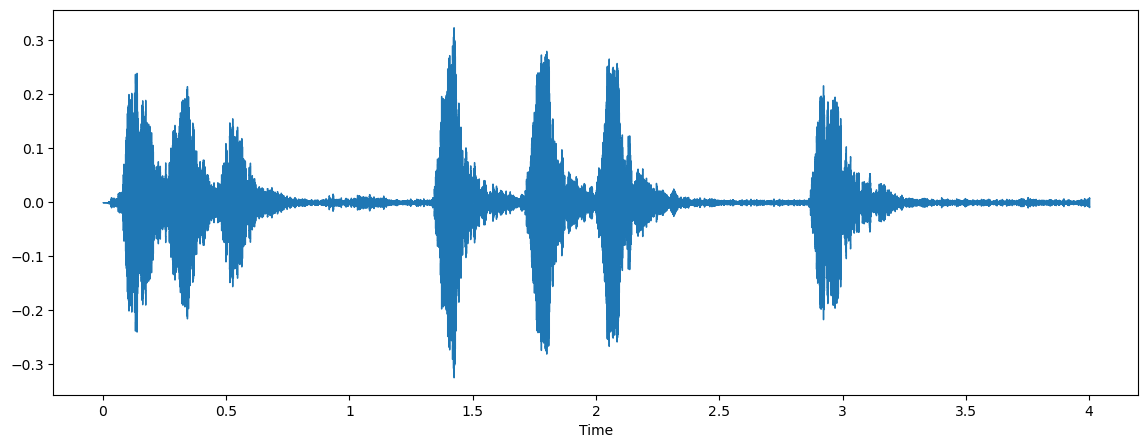

In [443]:
# Dog Sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(test_audio)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(test_audio)

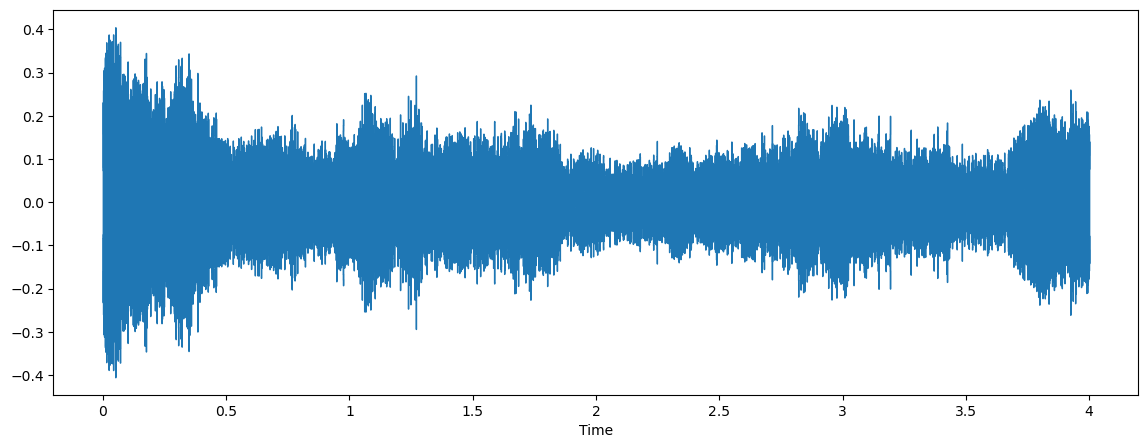

In [748]:
# Car honk Sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load("car_honk.wav")
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio("car_honk.wav")

In [749]:
sample_rate #Sample rates are usually measured per second, using kilohertz (kHz) or cycles per second

22050

## we use librosa over scipy because it normilize the data, scipy doesnot and librosa is most popular in audio classfication

In [750]:
import pandas as pd

metadata = pd.read_csv("UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [751]:
##Check wheather the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

#### Import Libraries

In [752]:
import librosa
import librosa.display as display
import pandas as pd
import numpy as np
import time 
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.offline as pyoff
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, plot, iplot

#### Definining some useful functions

In [753]:
def saveModel(model_obj,model_file_name, weights_file_name = None):
    """Save keras model to disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    model_json = model_obj.to_json()
    with open("{}.json".format(model_file_name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("{}.h5".format(weights_file_name))
    print("Saved model {} to disk".format(model_file_name))

In [754]:
from keras.models import model_from_json
def loadModel(model_file_name, weights_file_name = None):
    """Load keras model from disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    # load json and create model
    json_file = open('{}.json'.format(model_file_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("{}.h5".format(weights_file_name))
    print("Loaded model {} from disk".format(model_file_name))
    return loaded_model

#### Load Audio files and extract features

In [755]:
### Extracting MFCC's for every audio file
import pandas as pd
import librosa
import os

audio_dataset_path = "D:/UrbanSound8k/audio/"
metadata = pd.read_csv("D:/UrbanSound8k/metadata/UrbanSound8K.csv")
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [756]:
#def loadAudioDataExtractFeatures(path_to_data,file_ID, file_format = 'wav'):
#    X, sample_rate = librosa.load(os.path.join(path_to_data, file_ID + '.' + file_format),
#               res_type='kaiser_fast')
#    # we extract mfcc feature from data
#    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
#    return mfccs


def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features


In [757]:
audio_dataset_path

'D:/UrbanSound8k/audio/'

In [758]:
#loadAudioDataExtractFeatures('Train', '0')
features_extractor('dog_bark.wav')

array([-3.9742188e+02,  1.4218434e+02,  1.0239103e+01, -9.6230564e+00,
       -8.1905851e+00,  7.6672630e+00, -1.0299530e+01, -7.1226473e+00,
       -3.5969064e+00, -5.6251779e+00, -2.4014688e+00, -3.5109861e+00,
        5.2140422e+00,  9.1520948e+00,  9.7396631e+00,  1.2672479e+01,
        2.4935956e+00, -1.9596183e-01,  2.0568910e+00,  1.2565480e-01,
        2.3887675e-01, -2.2244754e+00, -4.1830082e+00, -8.7841505e-01,
        5.5512708e-01,  1.4530714e+00,  1.5828406e+00,  2.5280831e+00,
        4.4751968e+00,  1.8469352e+00,  8.8243917e-02, -2.5079671e-02,
        1.9693788e+00,  1.1326451e+00,  1.8206301e-01, -9.0641987e-01,
       -2.5448070e+00, -1.7134562e+00, -1.3600037e+00,  3.9560735e-01],
      dtype=float32)

In [759]:
#X = [loadAudioDataExtractFeatures('Train',str(i)) for i in train.ID]
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    #final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append(data)

3555it [07:51,  7.93it/s]C:\Users\shree\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [17:43, 12.51it/s]C:\Users\shree\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\shree\AppData\Roaming\Python\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [18:34,  7.83it/s]


In [760]:
extracted_features[1]

array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
        2.4529229e-01,  1.7347328e+01,  2.0955827e+00,  1.0712965e+01,
       -1.3986126e+00,  1.2310798e+01, -1.1208863e+01,  2.1075323e+01,
       -9.4902792e+00,  1.3526470e+01, -2.3910540e-01,  7.1590004e+00,
       -3.0809758e+00,  1.1367646e+01, -6.3027668e+00,  6.8781147e+00,
       -2.8902097e+00,  8.7614346e+00, -2.3304422e+00,  8.4166384e+00,
       -1.6700817e+00,  1.2775004e+00, -4.4198775e+00,  1.2626288e+00,
       -6.1339469e+00,  8.6342728e-01, -1.0314473e+00,  1.8680787e+00,
       -9.6006936e-01,  3.6977027e-02, -1.5435236e-02, -7.1756437e-02,
       -1.5988851e+00,  5.3489321e-01, -5.4468733e-01,  4.4632089e-01],
      dtype=float32)

In [761]:
X = extracted_features

In [762]:
X

[array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
         -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
           6.652703  ,   14.324025  ,  -12.167682  ,    2.2768366 ,
         -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445676,
         -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
         -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
          -6.6628237 ,    0.35971048,   -3.9084098 ,    4.7756243 ,
          -6.384521  ,   -5.379818  ,    0.91597855,    6.9704933 ,
          -0.248668  ,    1.6782187 ,   -5.6111817 ,   -2.9643466 ,
           3.1490574 ,   -1.693053  ,   -0.6169836 ,    0.3860054 ],
       dtype=float32),
 array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
         2.4529229e-01,  1.7347328e+01,  2.0955827e+00,  1.0712965e+01,
        -1.3986126e+00,  1.2310798e+01, -1.1208863e+01,  2.1075323e+01,
        -9.4902792e+00,  1.3526470e+01, -2.3910540e-01,  7.1590004e+00,
        

In [763]:
metadata['class']

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [764]:
y = metadata['class']
y

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [765]:
#X_test = [loadAudioDataExtractFeatures('Test',str(i)) for i in test.ID]
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [766]:

#np.save('X_train.npy', np.array(X))

In [767]:
#np.save('X_test.npy', np.array(X_test))

In [768]:
#X = np.load('X_train.npy')
#X_test = np.load('X_test.npy')

In [769]:
#y = train.Class

In [770]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
X = np.array(X )
y = np.array(y.tolist())

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))

In [771]:
X[0]

array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
        -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
          6.652703  ,   14.324025  ,  -12.167682  ,    2.2768366 ,
        -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445676,
        -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
        -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
         -6.6628237 ,    0.35971048,   -3.9084098 ,    4.7756243 ,
         -6.384521  ,   -5.379818  ,    0.91597855,    6.9704933 ,
         -0.248668  ,    1.6782187 ,   -5.6111817 ,   -2.9643466 ,
          3.1490574 ,   -1.693053  ,   -0.6169836 ,    0.3860054 ],
      dtype=float32)

In [772]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [773]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [774]:
num_labels = y.shape[1]

In [775]:
y_train.shape

(6985,)

In [776]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.model_selection import  train_test_split

In [777]:
import keras.backend as K
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [778]:
model_name = 'Basic_NN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [779]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 256)               10496     
                                                                 
 activation_66 (Activation)  (None, 256)               0         
                                                                 
 dropout_44 (Dropout)        (None, 256)               0         
                                                                 
 dense_67 (Dense)            (None, 256)               65792     
                                                                 
 activation_67 (Activation)  (None, 256)               0         
                                                                 
 dropout_45 (Dropout)        (None, 256)               0         
                                                                 
 dense_68 (Dense)            (None, 10)              

In [780]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 124)
x_train.shape

(5850, 40)

In [781]:
model.fit(x_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Epoch 1/15000
138/138 [==============================] - 3s 10ms/step - loss: 12.6650 - acc: 0.1860 - recall: 0.1556 - val_loss: 2.1362 - val_acc: 0.1709 - val_recall: 0.0383
Epoch 2/15000
138/138 [==============================] - 1s 8ms/step - loss: 2.6232 - acc: 0.2145 - recall: 0.0858 - val_loss: 2.1156 - val_acc: 0.2577 - val_recall: 0.0370
Epoch 3/15000
138/138 [==============================] - 1s 7ms/step - loss: 2.1983 - acc: 0.2560 - recall: 0.0915 - val_loss: 2.0138 - val_acc: 0.3308 - val_recall: 0.0505
Epoch 4/15000
138/138 [==============================] - 1s 7ms/step - loss: 2.0438 - acc: 0.2947 - recall: 0.1107 - val_loss: 1.8704 - val_acc: 0.3684 - val_recall: 0.0709
Epoch 5/15000
138/138 [==============================] - 1s 7ms/step - loss: 1.9321 - acc: 0.3194 - recall: 0.1261 - val_loss: 1.7707 - val_acc: 0.3807 - val_recall: 0.1056
Epoch 6/15000
138/138 [==============================] - 1s 8ms/step - loss: 1.8469 - acc: 0.3551 - recall: 0.1549 - val_loss: 1.6899

In [782]:
model.metrics_names

['loss', 'acc', 'recall']

In [783]:
model.evaluate(x_train, y_train)

183/183 [==============================] - 0s 3ms/step - loss: 0.8877 - acc: 0.7234 - recall: 0.4942


[0.8877488374710083, 0.7234188318252563, 0.49419400095939636]

In [784]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

91/91 [==============================] - 0s 2ms/step


In [785]:
test_preds

array([[7.89078414e-01, 2.77915504e-03, 3.79783213e-02, ...,
        1.73507500e-02, 2.60622948e-02, 5.08698300e-02],
       [8.34779143e-02, 2.73349863e-02, 9.80309024e-02, ...,
        2.05069989e-01, 1.28914136e-02, 2.64613535e-02],
       [1.33875787e-01, 3.31230112e-04, 2.55250409e-02, ...,
        7.76775298e-04, 5.64277591e-03, 2.92388760e-02],
       ...,
       [2.20272061e-03, 7.08428118e-03, 3.55512602e-03, ...,
        9.14656878e-01, 3.44863944e-02, 1.29192509e-02],
       [2.29381785e-01, 2.08196156e-02, 1.79722354e-01, ...,
        8.21481049e-02, 4.09523398e-02, 2.67366886e-01],
       [2.15073004e-02, 1.27640301e-02, 4.63814020e-01, ...,
        4.02487523e-04, 1.12320825e-01, 6.36550933e-02]], dtype=float32)

In [786]:
train_preds

array([[0.11388164, 0.0266369 , 0.3526067 , ..., 0.00690249, 0.07112475,
        0.18021733],
       [0.05076975, 0.03751589, 0.04226923, ..., 0.47376263, 0.00982914,
        0.14978239],
       [0.1215851 , 0.02886758, 0.25229904, ..., 0.0183943 , 0.11035977,
        0.12942934],
       ...,
       [0.05822812, 0.01007833, 0.01972438, ..., 0.1171416 , 0.510319  ,
        0.03770131],
       [0.6351491 , 0.0322969 , 0.04184049, ..., 0.13542351, 0.00691575,
        0.07271888],
       [0.11421076, 0.02155809, 0.3362252 , ..., 0.01030785, 0.07770435,
        0.11524764]], dtype=float32)

In [787]:


test_preds.argmax(axis=1).shape


(2882,)

In [788]:
y_test.argmax(axis=1).shape

(2882,)

In [789]:
train_preds.argmax(axis=1)

array([2, 7, 2, ..., 8, 0, 2], dtype=int64)

In [790]:
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 3ms/step - loss: 0.9676 - acc: 0.6954 - recall: 0.4698


[0.9675887823104858, 0.6953504681587219, 0.46978020668029785]

In [791]:
saveModel(model,model_file_name='basic_NN')

Saved model basic_NN to disk


In [792]:
model = loadModel('basic_NN')

Loaded model basic_NN from disk


In [793]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [794]:
model.evaluate(x_test, y_test)

91/91 [==============================] - 1s 3ms/step - loss: 0.9676 - acc: 0.6954 - recall: 0.4698


[0.9675887823104858, 0.6953504681587219, 0.46978020668029785]

In [795]:
from sklearn.metrics import classification_report

In [796]:
lb.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [797]:
import sklearn

In [798]:
sklearn.__version__

'1.2.1'

In [799]:
# !pip install  --user --upgrade scikit-learn

In [800]:
target_names = lb.classes_

In [801]:
temp = pd.DataFrame(classification_report(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

temp

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.641873,0.950000,0.478261,0.716724,0.895833,0.832143,0.972222,0.769648,0.794702,0.527778,0.69535,0.757918,0.729560
recall,0.685294,0.754967,0.700000,0.626866,0.682540,0.689349,0.267176,0.879257,0.833333,0.631420,0.69535,0.675020,0.695350
f1-score,0.662873,0.841328,0.568266,0.668790,0.774775,0.754045,0.419162,0.820809,0.813559,0.574966,0.69535,0.689857,0.696586
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.69535,2882.000000,2882.000000


In [399]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
air_conditioner,207,0,56,5,2,23,0,7,1,39
car_horn,3,108,11,3,1,3,0,7,2,13
children_playing,5,1,263,17,3,13,0,2,7,19
dog_bark,9,0,60,217,6,11,1,0,12,19
drilling,5,0,30,13,219,1,1,18,6,22
engine_idling,40,0,37,0,1,235,0,0,10,15
gun_shot,1,0,28,54,2,6,32,3,2,3
jackhammer,12,0,5,0,22,1,0,266,0,17
siren,5,0,24,16,0,4,0,1,234,4
street_music,14,1,85,14,4,20,0,4,13,176


In [400]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
precision = precision_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
recall = recall_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
f1score = f1_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )

In [401]:
data = {
    "model" : "Basic_NN",
    "max_depth": 15 ,
    "criterion": "entropy" ,
    "splitter": "best" ,
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names.tolist()
}

data

{'model': 'Basic_NN',
 'max_depth': 15,
 'criterion': 'entropy',
 'splitter': 'best',
 'accuracy': 0.6790423317140875,
 'precision': [0.6877076411960132,
  0.9818181818181818,
  0.43906510851419034,
  0.640117994100295,
  0.8423076923076923,
  0.7413249211356467,
  0.9411764705882353,
  0.8636363636363636,
  0.8153310104529616,
  0.5382262996941896],
 'recall': [0.6088235294117647,
  0.7152317880794702,
  0.796969696969697,
  0.6477611940298508,
  0.6952380952380952,
  0.6952662721893491,
  0.24427480916030533,
  0.8235294117647058,
  0.8125,
  0.5317220543806647],
 'F1_score': [0.6458658346333852,
  0.8275862068965517,
  0.5662002152852531,
  0.6439169139465876,
  0.7617391304347827,
  0.7175572519083969,
  0.3878787878787879,
  0.8431061806656102,
  0.8139130434782609,
  0.5349544072948328],
 'class_names': ['air_conditioner',
  'car_horn',
  'children_playing',
  'dog_bark',
  'drilling',
  'engine_idling',
  'gun_shot',
  'jackhammer',
  'siren',
  'street_music']}

In [402]:
import json
with open("model_performance/Basic_NN.json", "w") as outfile:
    json.dump(data, outfile)

### RNN

In [802]:
from keras.layers import SimpleRNN

In [803]:
# SimpleRNN()

In [804]:
# x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [805]:
x_rnn_train  = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_rnn_test  = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [806]:
x_rnn_test.shape

(2882, 1, 40)

In [807]:
model_name = 'RNN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(SimpleRNN(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [808]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 256)               76032     
                                                                 
 dense_69 (Dense)            (None, 256)               65792     
                                                                 
 activation_69 (Activation)  (None, 256)               0         
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               65792     
                                                                 
 activation_70 (Activation)  (None, 256)               0         
                                                                 
 dropout_47 (Dropout)        (None, 256)             

In [809]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Epoch 1/15000
138/138 [==============================] - 5s 13ms/step - loss: 1.9800 - acc: 0.2986 - recall: 0.0785 - val_loss: 1.6100 - val_acc: 0.4627 - val_recall: 0.1872
Epoch 2/15000
138/138 [==============================] - 1s 9ms/step - loss: 1.6357 - acc: 0.4256 - recall: 0.1941 - val_loss: 1.3976 - val_acc: 0.5222 - val_recall: 0.2418
Epoch 3/15000
138/138 [==============================] - 1s 9ms/step - loss: 1.4557 - acc: 0.4910 - recall: 0.2878 - val_loss: 1.3333 - val_acc: 0.5564 - val_recall: 0.2536
Epoch 4/15000
138/138 [==============================] - 1s 9ms/step - loss: 1.3330 - acc: 0.5437 - recall: 0.3317 - val_loss: 1.2159 - val_acc: 0.5981 - val_recall: 0.3686
Epoch 5/15000
138/138 [==============================] - 1s 9ms/step - loss: 1.2298 - acc: 0.5808 - recall: 0.4070 - val_loss: 1.1159 - val_acc: 0.6364 - val_recall: 0.4543
Epoch 6/15000
138/138 [==============================] - 1s 9ms/step - loss: 1.1543 - acc: 0.6084 - recall: 0.4387 - val_loss: 1.1191 

In [810]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict(x_rnn_train)
test_preds = model.predict(x_rnn_test)
target_names = lb.classes_
test2 = pd.DataFrame(classification_report(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))
test2

['loss', 'acc', 'recall']
183/183 [==============================] - 1s 3ms/step - loss: 0.5766 - acc: 0.8229 - recall: 0.7108
[0.5765860080718994, 0.822905957698822, 0.7107502818107605]
91/91 [==============================] - 0s 3ms/step - loss: 0.7437 - acc: 0.7658 - recall: 0.6714
[0.7437030673027039, 0.765787661075592, 0.6713598966598511]
91/91 [==============================] - 0s 3ms/step


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.796657,0.949580,0.613003,0.680380,0.806061,0.812155,0.736842,0.911392,0.816456,0.626911,0.765788,0.774944,0.765593
recall,0.841176,0.748344,0.600000,0.641791,0.844444,0.869822,0.641221,0.891641,0.895833,0.619335,0.765788,0.759361,0.765788
f1-score,0.818312,0.837037,0.606432,0.660522,0.824806,0.840000,0.685714,0.901408,0.854305,0.623100,0.765788,0.765164,0.764406
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.765788,2882.000000,2882.000000


In [508]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
air_conditioner,290,0,16,0,0,7,0,5,1,21
car_horn,0,113,1,8,2,12,0,4,3,8
children_playing,8,2,239,13,1,26,4,3,6,28
dog_bark,5,3,25,219,18,21,16,0,9,19
drilling,2,1,9,15,249,5,1,13,1,19
engine_idling,3,0,14,2,1,310,0,3,1,4
gun_shot,2,0,4,25,2,6,80,3,5,4
jackhammer,3,0,1,0,2,0,0,297,0,20
siren,1,0,11,15,0,11,0,0,247,3
street_music,11,4,47,12,6,18,0,4,10,219


In [319]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
precision = precision_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
recall = recall_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
f1score = f1_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )

In [321]:
data = {
    "model" : "RNN",
    "max_depth": 15 ,
    "criterion": "entropy" ,
    "splitter": "best" ,
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names.tolist()
}

data

{'model': 'RNN',
 'max_depth': 15,
 'criterion': 'entropy',
 'splitter': 'best',
 'accuracy': 0.7765440666204025,
 'precision': [0.78125,
  0.9457364341085271,
  0.6634615384615384,
  0.6371191135734072,
  0.8421052631578947,
  0.8571428571428571,
  0.5857142857142857,
  0.9211356466876972,
  0.8494623655913979,
  0.6889632107023411],
 'recall': [0.8823529411764706,
  0.8079470198675497,
  0.6272727272727273,
  0.6865671641791045,
  0.8126984126984127,
  0.9053254437869822,
  0.6259541984732825,
  0.9040247678018576,
  0.8229166666666666,
  0.622356495468278],
 'F1_score': [0.8287292817679558,
  0.8714285714285714,
  0.6448598130841121,
  0.6609195402298851,
  0.8271405492730209,
  0.8805755395683452,
  0.6051660516605166,
  0.9125,
  0.8359788359788359,
  0.653968253968254],
 'class_names': ['air_conditioner',
  'car_horn',
  'children_playing',
  'dog_bark',
  'drilling',
  'engine_idling',
  'gun_shot',
  'jackhammer',
  'siren',
  'street_music']}

In [322]:
import json
with open("model_performance/RNN.json", "w") as outfile:
    json.dump(data, outfile)

In [323]:
test2

'                  precision    recall  f1-score   support\n\n air_conditioner       0.78      0.88      0.83       340\n        car_horn       0.95      0.81      0.87       151\nchildren_playing       0.66      0.63      0.64       330\n        dog_bark       0.64      0.69      0.66       335\n        drilling       0.84      0.81      0.83       315\n   engine_idling       0.86      0.91      0.88       338\n        gun_shot       0.59      0.63      0.61       131\n      jackhammer       0.92      0.90      0.91       323\n           siren       0.85      0.82      0.84       288\n    street_music       0.69      0.62      0.65       331\n\n        accuracy                           0.78      2882\n       macro avg       0.78      0.77      0.77      2882\n    weighted avg       0.78      0.78      0.78      2882\n'

### LSTM

In [811]:
from keras.layers import LSTM

In [812]:
model_name = 'Basic_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(LSTM(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [813]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 256)               304128    
                                                                 
 dense_72 (Dense)            (None, 256)               65792     
                                                                 
 activation_72 (Activation)  (None, 256)               0         
                                                                 
 dropout_48 (Dropout)        (None, 256)               0         
                                                                 
 dense_73 (Dense)            (None, 256)               65792     
                                                                 
 activation_73 (Activation)  (None, 256)               0         
                                                                 
 dropout_49 (Dropout)        (None, 256)             

In [814]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Epoch 1/15000
138/138 [==============================] - 13s 24ms/step - loss: 1.8071 - acc: 0.3485 - recall: 0.1064 - val_loss: 1.4395 - val_acc: 0.4874 - val_recall: 0.2396
Epoch 2/15000
138/138 [==============================] - 2s 16ms/step - loss: 1.3528 - acc: 0.5446 - recall: 0.3318 - val_loss: 1.1568 - val_acc: 0.6220 - val_recall: 0.4404
Epoch 3/15000
138/138 [==============================] - 2s 16ms/step - loss: 1.1141 - acc: 0.6184 - recall: 0.4614 - val_loss: 1.0543 - val_acc: 0.6589 - val_recall: 0.5343
Epoch 4/15000
138/138 [==============================] - 2s 16ms/step - loss: 0.9797 - acc: 0.6724 - recall: 0.5383 - val_loss: 0.9510 - val_acc: 0.6965 - val_recall: 0.5928
Epoch 5/15000
138/138 [==============================] - 2s 16ms/step - loss: 0.8716 - acc: 0.7123 - recall: 0.6039 - val_loss: 0.8944 - val_acc: 0.7232 - val_recall: 0.5897
Epoch 6/15000
138/138 [==============================] - 2s 16ms/step - loss: 0.7945 - acc: 0.7358 - recall: 0.6353 - val_loss: 0

In [815]:
x_rnn_train

array([[[-3.0903986e+02,  1.6631850e+02, -3.9367302e+01, ...,
         -4.2374781e-01,  4.9999580e-01,  3.5492060e-01]],

       [[-1.6597464e+02,  1.1904339e+02,  1.4416842e+01, ...,
         -5.2237539e-03, -1.9068485e+00,  9.5947009e-01]],

       [[-3.3742798e+02,  1.0117063e+02, -2.5961548e+01, ...,
          5.4038383e-02, -4.2483950e+00, -3.6188965e+00]],

       ...,

       [[-4.2744183e+01,  1.1466968e+02, -1.9795477e+01, ...,
         -9.9222893e-01, -8.1594867e-01, -1.5194926e+00]],

       [[-1.4849126e+02,  1.3231693e+02, -1.7379131e+01, ...,
         -1.1040756e+00, -1.0245634e-01, -3.3088303e-01]],

       [[-1.6949200e+02,  9.2868042e+01, -6.0105713e+01, ...,
          2.8644040e+00,  1.4851780e+00, -3.6366940e+00]]], dtype=float32)

In [816]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict(x_rnn_train)
test_preds = model.predict(x_rnn_test)
target_names = lb.classes_
test3 = pd.DataFrame(classification_report(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))
test3

['loss', 'acc', 'recall']
183/183 [==============================] - 1s 5ms/step - loss: 0.2983 - acc: 0.9125 - recall: 0.8844
[0.29825150966644287, 0.9124786257743835, 0.8844183683395386]
91/91 [==============================] - 0s 5ms/step - loss: 0.5854 - acc: 0.8369 - recall: 0.8080
[0.585413932800293, 0.836918830871582, 0.8080357313156128]
91/91 [==============================] - 0s 4ms/step


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.865169,0.920863,0.747024,0.773810,0.859873,0.855586,0.736434,0.914634,0.942446,0.749164,0.836919,0.836500,0.836328
recall,0.905882,0.847682,0.760606,0.776119,0.857143,0.928994,0.725191,0.928793,0.909722,0.676737,0.836919,0.831687,0.836919
f1-score,0.885057,0.882759,0.753754,0.774963,0.858506,0.890780,0.730769,0.921659,0.925795,0.711111,0.836919,0.833515,0.836056
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.836919,2882.000000,2882.000000


In [516]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
air_conditioner,305,0,10,0,0,1,0,17,0,7
car_horn,2,131,3,1,2,3,0,6,1,2
children_playing,7,6,265,3,1,12,2,7,11,16
dog_bark,7,7,32,225,6,14,3,2,20,19
drilling,1,3,7,5,250,5,1,22,6,15
engine_idling,3,1,4,1,2,316,0,1,1,9
gun_shot,1,0,7,20,3,1,85,3,7,4
jackhammer,2,1,0,0,1,0,0,307,0,12
siren,0,1,7,9,0,2,0,2,265,2
street_music,22,6,37,10,4,12,0,19,5,216


In [517]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
precision = precision_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
recall = recall_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
f1score = f1_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )

In [518]:
data = {
    "model" : "LSTM",
    "max_depth": 15 ,
    "criterion": "entropy" ,
    "splitter": "best" ,
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names.tolist()
}

data

{'model': 'LSTM',
 'max_depth': 15,
 'criterion': 'entropy',
 'splitter': 'best',
 'accuracy': 0.8206106870229007,
 'precision': [0.8714285714285714,
  0.8397435897435898,
  0.7123655913978495,
  0.8211678832116789,
  0.929368029739777,
  0.8633879781420765,
  0.9340659340659341,
  0.7953367875647669,
  0.8386075949367089,
  0.7152317880794702],
 'recall': [0.8970588235294118,
  0.8675496688741722,
  0.803030303030303,
  0.6716417910447762,
  0.7936507936507936,
  0.9349112426035503,
  0.648854961832061,
  0.9504643962848297,
  0.9201388888888888,
  0.6525679758308157],
 'F1_score': [0.8840579710144928,
  0.8534201954397395,
  0.754985754985755,
  0.7389162561576356,
  0.8561643835616438,
  0.8977272727272727,
  0.7657657657657658,
  0.8660084626234134,
  0.8774834437086093,
  0.6824644549763033],
 'class_names': ['air_conditioner',
  'car_horn',
  'children_playing',
  'dog_bark',
  'drilling',
  'engine_idling',
  'gun_shot',
  'jackhammer',
  'siren',
  'street_music']}

In [519]:
import json
with open("model_performance/LSTM.json", "w") as outfile:
    json.dump(data, outfile)

In [520]:
saveModel(model, 'Basic_LSTM')

Saved model Basic_LSTM to disk


In [817]:
from keras.layers import Bidirectional

In [818]:
model_name = 'Bidirectional_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model = Sequential()
model.add(Bidirectional(LSTM(256 ,return_sequences=True),
                        input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model.add(Bidirectional(LSTM(10)))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [819]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 1, 512)           608256    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               41840     
 nal)                                                            
                                                                 
 dense_75 (Dense)            (None, 256)               5376      
                                                                 
 activation_75 (Activation)  (None, 256)               0         
                                                                 
 dropout_50 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 256)             

In [820]:
model.fit(x_rnn_train, y_train, callbacks = callbacks,
          epochs=15000, validation_split=0.25)

Epoch 1/15000
138/138 [==============================] - 20s 41ms/step - loss: 1.8170 - acc: 0.3529 - recall: 0.1064 - val_loss: 1.3936 - val_acc: 0.5079 - val_recall: 0.3191
Epoch 2/15000
138/138 [==============================] - 3s 20ms/step - loss: 1.2362 - acc: 0.5940 - recall: 0.4090 - val_loss: 1.1317 - val_acc: 0.6364 - val_recall: 0.4978
Epoch 3/15000
138/138 [==============================] - 3s 20ms/step - loss: 1.0153 - acc: 0.6727 - recall: 0.5491 - val_loss: 0.9560 - val_acc: 0.6938 - val_recall: 0.5880
Epoch 4/15000
138/138 [==============================] - 3s 20ms/step - loss: 0.8549 - acc: 0.7260 - recall: 0.6250 - val_loss: 0.9223 - val_acc: 0.7143 - val_recall: 0.6458
Epoch 5/15000
138/138 [==============================] - 3s 20ms/step - loss: 0.7510 - acc: 0.7629 - recall: 0.6858 - val_loss: 0.8763 - val_acc: 0.7334 - val_recall: 0.6687
Epoch 6/15000
138/138 [==============================] - 3s 20ms/step - loss: 0.7313 - acc: 0.7654 - recall: 0.6852 - val_loss: 0

In [821]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 1, 512)           608256    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               41840     
 nal)                                                            
                                                                 
 dense_75 (Dense)            (None, 256)               5376      
                                                                 
 activation_75 (Activation)  (None, 256)               0         
                                                                 
 dropout_50 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 256)             

In [822]:
print(model.metrics_names)
print(model.evaluate(x_rnn_train, y_train))
print(model.evaluate(x_rnn_test, y_test))
train_preds = model.predict(x_rnn_train)
test_preds = model.predict(x_rnn_test)
target_names = lb.classes_
test4 = pd.DataFrame(classification_report(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1),
                      target_names = target_names,
                     output_dict = True
                     ))

['loss', 'acc', 'recall']
183/183 [==============================] - 1s 6ms/step - loss: 0.3242 - acc: 0.9007 - recall: 0.8696
[0.3242163360118866, 0.9006837606430054, 0.869640588760376]
91/91 [==============================] - 1s 6ms/step - loss: 0.6032 - acc: 0.8276 - recall: 0.7977
[0.6031630039215088, 0.8275502920150757, 0.7977335453033447]
91/91 [==============================] - 1s 5ms/step


In [823]:
test4

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.922619,0.967742,0.788679,0.820423,0.831288,0.848404,0.712121,0.805627,0.932836,0.694737,0.82755,0.832448,0.831250
recall,0.911765,0.794702,0.633333,0.695522,0.860317,0.943787,0.717557,0.975232,0.868056,0.797583,0.82755,0.819785,0.827550
f1-score,0.917160,0.872727,0.702521,0.752827,0.845554,0.893557,0.714829,0.882353,0.899281,0.742616,0.82755,0.822342,0.825627
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.82755,2882.000000,2882.000000


In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
air_conditioner,284,0,8,6,1,0,0,15,5,21
car_horn,1,125,3,3,3,2,3,4,2,5
children_playing,1,1,272,8,11,4,2,2,1,28
dog_bark,0,0,24,259,11,4,13,0,7,17
drilling,0,0,1,6,291,0,0,7,3,7
engine_idling,0,0,18,9,2,296,2,0,4,7
gun_shot,1,0,6,17,6,0,92,2,1,6
jackhammer,1,0,0,0,16,0,0,299,0,7
siren,0,0,15,18,1,0,1,0,252,1
street_music,8,2,34,10,14,10,1,2,9,241


In [174]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1))
precision = precision_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
recall = recall_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )
f1score = f1_score( y_pred=test_preds.argmax(axis=1),
                      y_true=y_test.argmax(axis=1) , average = None )

In [175]:
print(accuracy)
print(precision)
print(recall)
print(f1score)

0.8365718251214435
[0.95945946 0.9765625  0.71391076 0.77083333 0.81741573 0.93670886
 0.80701754 0.90332326 0.88732394 0.70882353]
[0.83529412 0.82781457 0.82424242 0.77313433 0.92380952 0.87573964
 0.70229008 0.92569659 0.875      0.72809668]
[0.89308176 0.89605735 0.76511955 0.77198212 0.86736215 0.90519878
 0.75102041 0.91437309 0.88111888 0.71833085]


In [176]:
data = {
    "model" : "LSTM-bilateral",
    "max_depth": 15 ,
    "criterion": "entropy" ,
    "splitter": "best" ,
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names.tolist()
}

data

{'model': 'LSTM-bilateral',
 'max_depth': 15,
 'criterion': 'entropy',
 'splitter': 'best',
 'accuracy': 0.8365718251214435,
 'precision': [0.9594594594594594,
  0.9765625,
  0.7139107611548556,
  0.7708333333333334,
  0.8174157303370787,
  0.9367088607594937,
  0.8070175438596491,
  0.9033232628398792,
  0.8873239436619719,
  0.7088235294117647],
 'recall': [0.8352941176470589,
  0.8278145695364238,
  0.8242424242424242,
  0.7731343283582089,
  0.9238095238095239,
  0.8757396449704142,
  0.7022900763358778,
  0.9256965944272446,
  0.875,
  0.7280966767371602],
 'F1_score': [0.8930817610062894,
  0.8960573476702509,
  0.7651195499296765,
  0.7719821162444114,
  0.8673621460506707,
  0.9051987767584098,
  0.7510204081632653,
  0.9143730886850153,
  0.881118881118881,
  0.7183308494783905],
 'class_names': ['air_conditioner',
  'car_horn',
  'children_playing',
  'dog_bark',
  'drilling',
  'engine_idling',
  'gun_shot',
  'jackhammer',
  'siren',
  'street_music']}

In [137]:
import json
with open("model_performance/bilaterla-lstm.json", "w") as outfile:
    json.dump(data, outfile)

In [107]:
x_rnn_test.shape

(2882, 1, 40)

In [108]:
test_preds.argmax(axis=1)

array([0, 4, 5, ..., 7, 9, 2], dtype=int64)

In [109]:
x_rnn_test

array([[[-1.50390488e+02,  1.55785400e+02,  1.03250637e+01, ...,
          1.31272173e+00,  7.35862160e+00,  1.31741810e+00]],

       [[-1.98904419e+02,  6.24489632e+01, -5.74669228e+01, ...,
          2.08756948e+00, -4.08054686e+00,  3.10692334e+00]],

       [[-3.06458771e+02,  1.60255157e+02,  1.83309269e+01, ...,
          4.26882792e+00,  6.52313280e+00, -1.52805960e+00]],

       ...,

       [[-1.45889404e+02,  1.66850525e+02, -5.31285896e+01, ...,
         -4.41866398e+00,  1.52748704e+00, -5.21590090e+00]],

       [[-2.65109680e+02,  1.31348358e+02, -3.13298855e+01, ...,
          2.57163501e+00, -4.98195744e+00, -3.16427207e+00]],

       [[-3.83464111e+02,  1.18230354e+02, -4.47635193e+01, ...,
         -1.10338390e+00,  2.84260201e+00, -8.70419964e-02]]],
      dtype=float32)

In [110]:
saveModel(model,'Bidirectional_LSTM_basic')

Saved model Bidirectional_LSTM_basic to disk


#### Testing soe random sounds 

- These sounds were downloaded from the internet from random websites

In [879]:
dog = features_extractor('Testing_files/car-horn1.wav')
dog = dog.reshape(1, 1, x_train.shape[1])


In [880]:
dog

array([[[-4.3981149e+02,  7.2959671e+01, -4.9268345e+01, -7.7186570e+00,
         -3.4035976e+01,  1.0960204e+01, -1.4048420e+01,  5.1630816e+00,
         -1.4273068e+01, -3.8898575e+00, -9.7973623e+00, -1.2394509e+01,
         -1.1562200e+01,  1.0803944e+01,  1.1626900e+01,  2.5402594e+01,
          1.7368963e+01,  1.1341491e+01,  1.2786510e+01,  1.6158473e+00,
         -7.4341016e+00, -1.5405456e+01, -1.6046431e+01,  7.5573057e-02,
          5.3085804e+00, -5.5158906e+00, -1.2383371e+01,  1.1943389e+01,
          2.9602507e+01, -1.7906575e+00, -2.9883619e+01, -1.3073343e+01,
          2.5232349e+01,  2.3829235e+01,  1.1862711e+01,  6.1994100e+00,
         -1.5875618e+00, -2.6381044e+01, -1.8064436e+01,  2.3716846e+01]]],
      dtype=float32)

In [881]:
x_train.shape

(5850, 40)

In [882]:
dog.shape

(1, 1, 40)

In [883]:
model.predict(dog)

1/1 [==============================] - 0s 46ms/step


array([[7.7857816e-12, 9.9999440e-01, 7.8776563e-10, 5.2296929e-07,
        3.0653769e-08, 3.0528478e-09, 1.6541633e-09, 1.9022559e-10,
        2.2942928e-09, 5.1347938e-06]], dtype=float32)

In [884]:
target_names[model.predict(dog).argmax(axis=1)]

1/1 [==============================] - 0s 40ms/step


array(['car_horn'], dtype='<U16')

In [848]:
model.predict(dog)

1/1 [==============================] - 0s 40ms/step


array([[7.0153817e-04, 1.8379275e-03, 1.0893961e-02, 4.1596685e-02,
        9.4762677e-03, 7.5041736e-04, 1.0777404e-02, 1.5316231e-03,
        3.7860361e-04, 9.2205566e-01]], dtype=float32)

In [175]:
def prepTestingData( file_name, path_to_file = os.getcwd()):
    #temp = loadAudioDataExtractFeatures(path_to_file,file_name)
    temp = features_extractor()
    temp = temp.reshape(1, 1, x_train.shape[1])
    return temp

In [230]:
traffic = prepTestingData('Sound_model_testing_files/Traffic_Jam-Yo_Mama-1164700013')

In [231]:
model.predict(traffic)

array([[8.5836740e-07, 9.8423499e-01, 2.5595795e-05, 5.4942199e-04,
        2.9425580e-06, 6.7058654e-04, 6.4532622e-05, 1.8285724e-05,
        2.4906924e-06, 1.4430250e-02]], dtype=float32)

In [232]:
model.predict_classes(traffic)

array([1])

In [233]:
target_names[model.predict_classes(traffic)]

array(['car_horn'], dtype='|S16')

In [168]:
print(model.predict(prepTestingData('Truck Idle And Pull Off-SoundBible.com-1854979252')))
print(model.predict_classes(prepTestingData('Truck Idle And Pull Off-SoundBible.com-1854979252')))

[[5.2300771e-04 7.7593909e-03 2.1584921e-02 5.2664643e-03 7.0475426e-04
  7.9487616e-01 1.2075792e-03 5.6022976e-04 1.5010108e-04 1.6736732e-01]]
[5]


In [173]:
for i in os.listdir('Sound_model_testing_files/'):
    print(i.split(".")[0])

muscle-car-daniel_simon
service-bell_daniel_simion
Driving Ambiance-SoundBible
Driving Ambiance-SoundBible
soundbible-person-whistling-at-girl-daniel_simon
sawing-wood-daniel_simon
airplane-landing_daniel_simion


In [237]:
for i in os.listdir('Sound_model_testing_files/'):
    i = i.split(".")[0]
    print("Actual : {}".format(i))
    print(model.predict(prepTestingData(i, 'Sound_model_testing_files/')))
    print(model.predict_classes(prepTestingData(i, 'Sound_model_testing_files/')))
    print("Predicted : {}".format(target_names[model.predict_classes(prepTestingData(i, 'Sound_model_testing_files/'))]))
    print("-----")

Actual : muscle-car-daniel_simon
[[9.8235655e-01 1.7412767e-05 1.2603774e-03 1.9844372e-03 2.7559671e-04
  1.6123786e-03 2.1714531e-04 6.1964389e-04 9.6753929e-03 1.9811450e-03]]
[0]
Predicted : ['air_conditioner']
-----
Actual : service-bell_daniel_simion
[[1.36804243e-04 1.47859350e-01 1.78302964e-03 7.35804677e-01
  1.15901865e-02 6.18520353e-05 7.12141767e-02 5.79571177e-04
  1.40949350e-03 2.95609441e-02]]
[3]
Predicted : ['dog_bark']
-----
Actual : soundbible-person-whistling-at-girl-daniel_simon
[[1.7222685e-06 2.0960924e-05 2.6173888e-05 3.5279733e-01 1.6631675e-07
  1.0635029e-05 1.0535595e-03 1.7781408e-08 6.4608306e-01 6.4253354e-06]]
[8]
Predicted : ['siren']
-----
Actual : sawing-wood-daniel_simon
[[1.7163341e-04 3.4094129e-02 4.2328192e-03 3.2407063e-01 3.5033823e-04
  1.3552909e-04 1.5879493e-02 1.9424024e-05 2.7745479e-04 6.2076855e-01]]
[9]
Predicted : ['street_music']
-----
Actual : airplane-landing_daniel_simion
[[7.2832612e-05 5.5994126e-03 3.4981415e-01 5.1639997e-

### Submission File

In [279]:
test_IDs = pd.read_csv('test.csv',usecols = ['ID'])

In [263]:
test_data = [loadAudioDataExtractFeatures('Test', str(i)) for i in test.ID]

In [264]:
np.save('test.npy', np.array(test_data))

In [270]:
test_data = np.load('test.npy')

In [272]:
test = np.array(test_data).reshape(test_data.shape[0], 1, test_data.shape[1])

In [275]:
test_data_preds = model.predict_classes(test)

In [278]:
test_data_preds.shape

(3297,)

In [280]:
test_data_preds_classes = [target_names[i] for i in test_data_preds]

In [290]:
test_sub = pd.DataFrame({'Class': test_data_preds_classes, 'ID':test_IDs.ID})

In [291]:
test_sub.to_csv('sub.csv',index=False)

In [634]:
temp.drop(columns='Model_name',inplace=True)
temp

KeyError: "['Model_name'] not found in axis"

In [636]:
test2.drop(columns='Model_name',inplace=True)
test3.drop(columns='Model_name',inplace=True)
test4.drop(columns='Model_name',inplace=True)


In [637]:
test3

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.898551,0.932836,0.561776,0.833333,0.885522,0.934169,0.793103,0.865546,0.943548,0.741379,0.8161,0.838976,0.834911
recall,0.911765,0.827815,0.881818,0.641791,0.834921,0.881657,0.702290,0.956656,0.812500,0.649547,0.8161,0.810076,0.816100
f1-score,0.905109,0.877193,0.686321,0.725126,0.859477,0.907154,0.744939,0.908824,0.873134,0.692432,0.8161,0.817971,0.818440
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.8161,2882.000000,2882.000000


In [610]:
test3['Model_name'] = 'LSTM'
test3

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg,Model_name
precision,0.898551,0.932836,0.561776,0.833333,0.885522,0.934169,0.793103,0.865546,0.943548,0.741379,0.8161,0.838976,0.834911,LSTM
recall,0.911765,0.827815,0.881818,0.641791,0.834921,0.881657,0.702290,0.956656,0.812500,0.649547,0.8161,0.810076,0.816100,LSTM
f1-score,0.905109,0.877193,0.686321,0.725126,0.859477,0.907154,0.744939,0.908824,0.873134,0.692432,0.8161,0.817971,0.818440,LSTM
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.8161,2882.000000,2882.000000,LSTM


In [611]:

test4

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.906061,0.952756,0.777419,0.761610,0.863777,0.835979,0.875000,0.876791,0.795977,0.748322,0.829979,0.839369,0.830336
recall,0.879412,0.801325,0.730303,0.734328,0.885714,0.934911,0.641221,0.947368,0.961806,0.673716,0.829979,0.819010,0.829979
f1-score,0.892537,0.870504,0.753125,0.747720,0.874608,0.882682,0.740088,0.910714,0.871069,0.709062,0.829979,0.825211,0.827361
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.829979,2882.000000,2882.000000


In [612]:
test4['Model_name'] = 'LSTM-bilateral'
test4

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg,Model_name
precision,0.906061,0.952756,0.777419,0.761610,0.863777,0.835979,0.875000,0.876791,0.795977,0.748322,0.829979,0.839369,0.830336,LSTM-bilateral
recall,0.879412,0.801325,0.730303,0.734328,0.885714,0.934911,0.641221,0.947368,0.961806,0.673716,0.829979,0.819010,0.829979,LSTM-bilateral
f1-score,0.892537,0.870504,0.753125,0.747720,0.874608,0.882682,0.740088,0.910714,0.871069,0.709062,0.829979,0.825211,0.827361,LSTM-bilateral
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.829979,2882.000000,2882.000000,LSTM-bilateral


In [150]:
results = pd.concat([temp,test2,test3,test4])


,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg,Model_name
precision,0.698507,0.939130,0.387187,0.663366,0.861660,0.864469,0.745098,0.834302,0.849057,0.675556,0.685982,0.751833,0.738424,ANN
recall,0.688235,0.715232,0.842424,0.600000,0.692063,0.698225,0.290076,0.888545,0.781250,0.459215,0.685982,0.665527,0.685982,ANN
f1-score,0.693333,0.812030,0.530534,0.630094,0.767606,0.772504,0.417582,0.860570,0.813743,0.546763,0.685982,0.684476,0.692371,ANN
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.685982,2882.000000,2882.000000,ANN
precision,0.884211,0.941667,0.636119,0.761905,0.832765,0.758621,0.756757,0.782051,0.845118,0.627976,0.767523,0.782719,0.773666,RNN
recall,0.741176,0.748344,0.715152,0.620896,0.774603,0.911243,0.641221,0.944272,0.871528,0.637462,0.767523,0.760590,0.767523,RNN
f1-score,0.806400,0.833948,0.673324,0.684211,0.802632,0.827957,0.694215,0.855540,0.858120,0.632684,0.767523,0.766903,0.766144,RNN
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.767523,2882.000000,2882.000000,RNN
precision,0.890173,0.914894,0.780142,0.713889,0.940141,0.812183,0.760684,0.918429,0.918440,0.698551,0.830673,0.834752,0.832791,LSTM
recall,0.905882,0.854305,0.666667,0.767164,0.847619,0.946746,0.679389,0.941176,0.899306,0.728097,0.830673,0.823635,0.830673,LSTM


In [171]:
temp.iloc[0]

TypeError: Cannot index by location index with a non-integer key

In [ ]:
dd

In [524]:
temp

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.871429,0.839744,0.712366,0.821168,0.929368,0.863388,0.934066,0.795337,0.838608,0.715232,0.820611,0.832070,0.824203
recall,0.897059,0.867550,0.803030,0.671642,0.793651,0.934911,0.648855,0.950464,0.920139,0.652568,0.820611,0.813987,0.820611
f1-score,0.884058,0.853420,0.754986,0.738916,0.856164,0.897727,0.765766,0.866008,0.877483,0.682464,0.820611,0.817699,0.818147
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.820611,2882.000000,2882.000000


<Axes: >

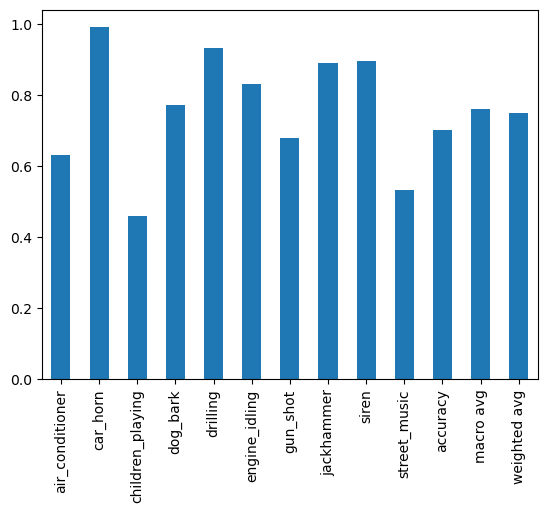

In [656]:
temp.iloc[0,:].plot(kind='bar')


In [628]:
import seaborn as sns

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

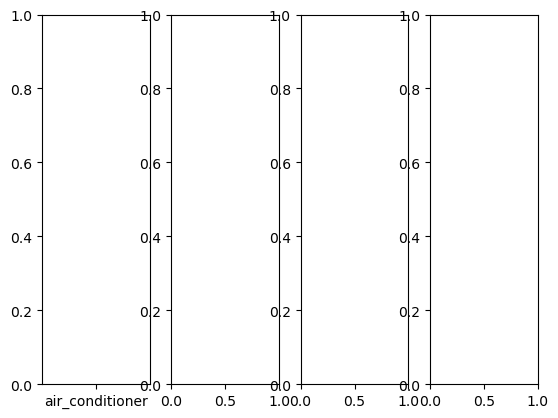

In [660]:
fig,axs = plt.subplots(nrows=1,ncols=4)
axs[0].plot(temp.iloc[0,:],kind='bar')
#axs[0]=(temp.iloc[0,:].plot(kind='bar'))
#axs[1]=(test2.iloc[0,:].plot(kind='bar'))
#temp.iloc[0,:].plot(kind='bar')

In [654]:
def plot_something(metric):
    metric_idx = {'precision':0,'recall':1,'f1-score':2}
    fig,axs = plt.subplots(nrows=1,ncols=4)
    result_reports = [temp,test2,test3,test4]
    #cnt = 0
    axs[0]=(temp.iloc[metric_idx[metric],:].plot(kind='bar'))
    axs[1]=(test2.iloc[metric_idx[metric],:].plot(kind='bar'))
    #for i in result_reports:
        #axs[cnt]=(i.iloc[metric_idx[metric],:].plot(kind='bar'))
        #cnt+=1

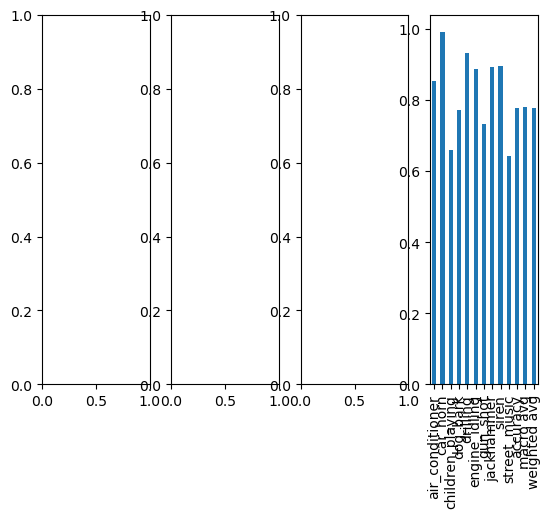

In [655]:
plot_something('precision')

In [645]:
test4

,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music,accuracy,macro avg,weighted avg
precision,0.906061,0.952756,0.777419,0.761610,0.863777,0.835979,0.875000,0.876791,0.795977,0.748322,0.829979,0.839369,0.830336
recall,0.879412,0.801325,0.730303,0.734328,0.885714,0.934911,0.641221,0.947368,0.961806,0.673716,0.829979,0.819010,0.829979
f1-score,0.892537,0.870504,0.753125,0.747720,0.874608,0.882682,0.740088,0.910714,0.871069,0.709062,0.829979,0.825211,0.827361
support,340.000000,151.000000,330.000000,335.000000,315.000000,338.000000,131.000000,323.000000,288.000000,331.000000,0.829979,2882.000000,2882.000000


In [677]:
def plot_something(metric):
    metric_idx = {'precision':0,'recall':1,'f1-score':2}
    fig,axs = plt.subplots(nrows=1,ncols=4)
    result_reports = [temp,test2,test3,test4]
    cnt = 0
    for i in result_reports:
        data = dict(i.iloc[metric_idx[metric],:])
        axs[cnt].bar(range(len(data)), list(data.values()), align='center')
        cnt+=1
    plt.show()

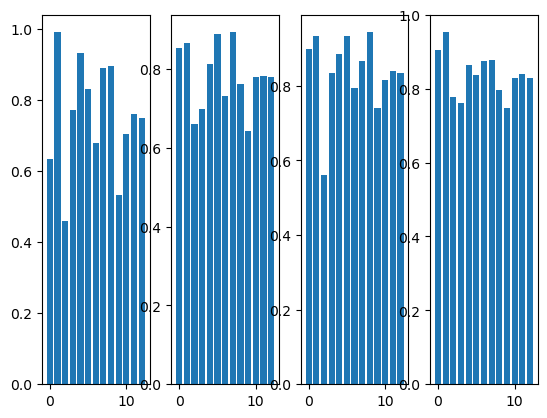

In [678]:
plot_something('precision')

In [698]:
def plot_something(metric):
    metric_idx = {'precision':0,'recall':1,'f1-score':2}
    fig,axs = plt.subplots(nrows=4,ncols=1,sharex=True)
    result_reports = [temp,test2,test3,test4]
    cnt = 0
    for i in result_reports:
        data = dict(i.iloc[metric_idx[metric],:])
        axs[cnt].barh(range(len(data)), list(data.values()), align='center')
        axs[cnt].set_yticks(range(len(data)))
        axs[cnt].set_yticklabels(list(data.keys()))
        axs[cnt].invert_yaxis()
        #axs[cnt].set_ylim([-2, len(data)-0.1])
        cnt+=1
        
    plt.show()

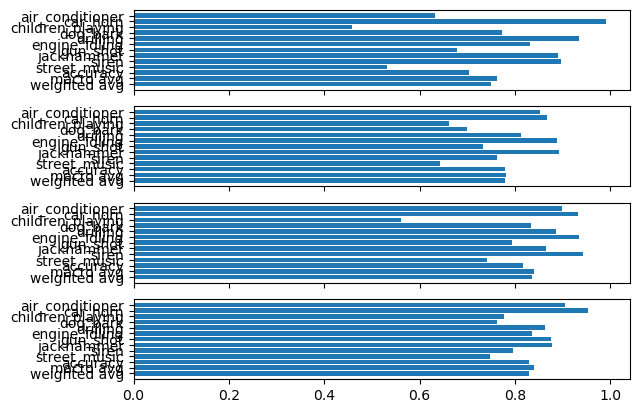

In [699]:
plot_something('precision')